In [1]:
import pandas as pd

### Ergast F1 DB
Data courtesy of http://ergast.com/mrd/. All CSV data has been downloaded and placed in the `data` directory.

### Lap times for all races since 2009

In [21]:
lap_times_df = pd.read_csv("data/lap_times.csv")
races_df = pd.read_csv("data/races.csv")
drivers_df = pd.read_csv("data/drivers.csv")

In [32]:
timing_df = (
    lap_times_df.set_index("raceId")
    .join(races_df.set_index("raceId")[["year", "name"]])
    .set_index("driverId")
    .join(drivers_df.set_index("driverId")["code"])
    .reset_index()
    .drop(axis=1, labels=["driverId"])
    .set_index(["year", "name", "code", "lap"])
)

In [33]:
timing_df

position      time  milliseconds
year name                  code lap                                  
2009 Australian Grand Prix HAM  1          13  1:49.088        109088
                                2          12  1:33.740         93740
                                3          11  1:31.600         91600
                                4          10  1:31.067         91067
                                5          10  1:32.129         92129
...                                       ...       ...           ...
2019 Abu Dhabi Grand Prix  ALB  51          5  1:42.376        102376
                                52          5  1:42.462        102462
                                53          6  1:44.788        104788
                                54          6  1:43.028        103028
                                55          6  1:43.358        103358

[472504 rows x 3 columns]

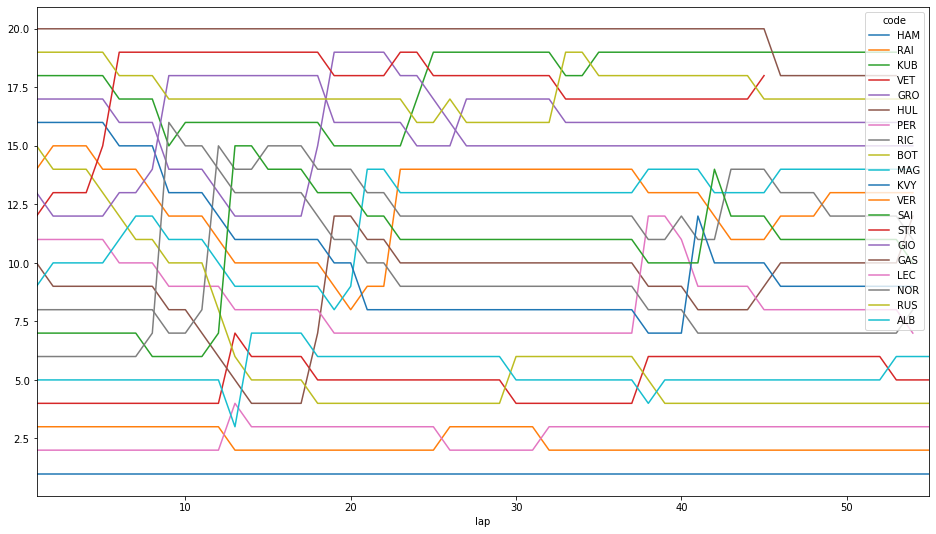

In [98]:
df = timing_df.xs([2019, "Abu Dhabi Grand Prix"]).swaplevel()["position"].unstack().plot(figsize=(16,9))

### Average pace last season
As a percentage of the fastest lap each race

In [283]:
last_season_df = timing_df.xs(2019)["milliseconds"]

In [286]:
last_season_df.div(last_season_df.groupby("name").min()).groupby("code").agg(["mean", "std"]).sort_values("mean")

,mean,std
code,,
LEC,1.071392,0.114709
BOT,1.072199,0.122981
HAM,1.074320,0.138839
VET,1.077775,0.126441
PER,1.078701,0.095014
VER,1.078889,0.132195
RIC,1.081951,0.106545
NOR,1.085896,0.113461
HUL,1.088048,0.111385


### Counting DNFs

In [296]:
status_df = pd.read_csv("data/status.csv")

In [288]:
results_df = pd.read_csv("data/results.csv")

In [300]:
dnf_df = results_df[["raceId", "driverId", "statusId"]].set_index("raceId").join(
    races_df.set_index("raceId")[["year", "name"]]
).set_index("driverId").join(drivers_df.set_index("driverId")["code"]).set_index(
    "statusId"
).join(
    status_df.set_index("statusId")
).reset_index().drop(
    axis=1, labels="statusId"
)

In [315]:
dnf_this_year_df = dnf_df.set_index("year").loc[2019]

In [329]:
goods = ["+1 Lap", "+2 Laps", "+3 Laps", "Finished"]
dnf_this_year_df[~dnf_this_year_df["status"].isin(goods)].groupby("code")["status"].count().sort_values()

code
ALB    1
BOT    2
GIO    2
RUS    2
RAI    2
KUB    2
PER    2
VER    2
STR    3
MAG    3
KVY    3
GAS    3
LEC    3
VET    3
HUL    4
SAI    4
NOR    6
RIC    6
GRO    7
Name: status, dtype: int64

### todo:
 - look at scaling average pace by length of tracks? Pct is probably not best metric given that diff between cars should be linear with lenght of track?
 - How can we estimate the delta required to overtake per track?
 - Maybe bayes model with estimate of delta with pct change overtake?